
# Data Visualization with Matplotlib - Exercises

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้

## Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.arange(0,100)
y = x*2
z = x**2
df = pd.read_csv('Superstore.csv',encoding = 'iso-8859-1')

## Exercise 1


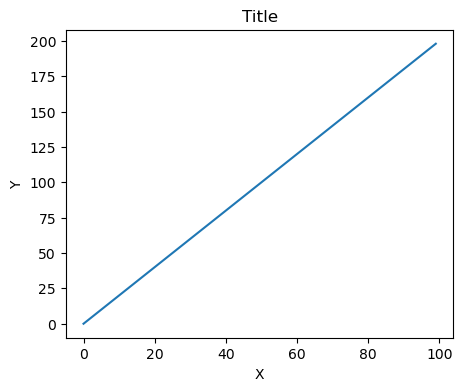

In [72]:
plt.figure(figsize = [5,4])
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')

plt.show()

## Exercise 2

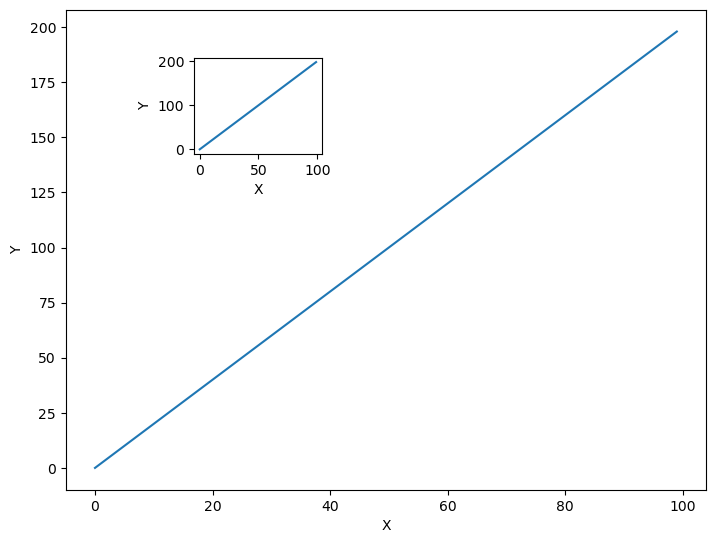

In [50]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(x,y)
a1.set_xlabel('X')
a1.set_ylabel('Y')

a2 = fig.add_axes([0.2,0.7,0.2,0.2])
a2.plot(x,y)
a2.set_xlabel('X')
a2.set_ylabel('Y')

plt.show()

## Exercise 3



**ใช้  arrays x, y และ z เพื่อทำการ plot บนแกนที่สร้างจากข้อที่แล้ว  (Notice อย่าลืมกำหนด  x - limits และ y - limits )**

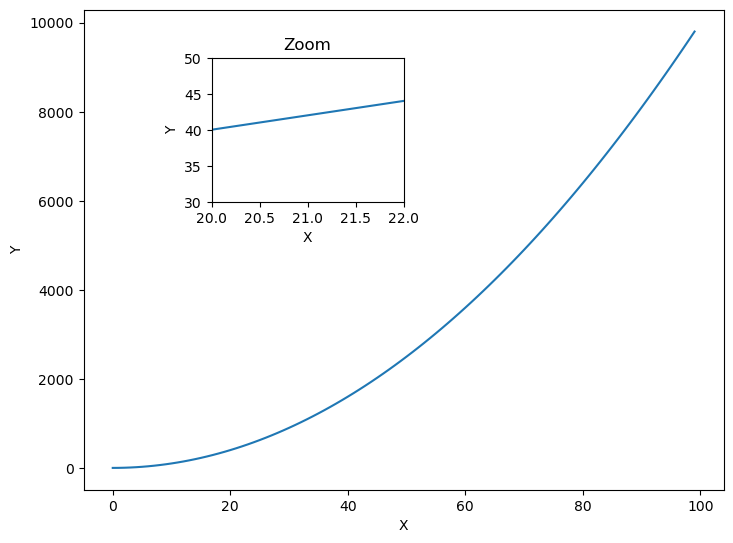

In [69]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(x,z)
a1.set_xlabel('X')
a1.set_ylabel('Y')

a2 = fig.add_axes([0.2,0.6,0.3,0.3])
a2.plot(x,y)
a2.set_title('Zoom')
a2.set_xlabel('X')
a2.set_ylabel('Y')

a2.set_xticks([20,20.5,21.0,21.5,22.0])
a2.set_xlim(20,22)
a2.set_yticks([30,35,40,45,50])
a2.set_ylim(30,50)
plt.show()

## Exercise 4

**จงใช้คำสั่ง plt.subplots(nrows=1, ncols=2)**

**จากนั้นให้ทำการ plot (x,y) และ plot (x,z) บนแกน axes  และให้ใช้งานคำสั่ง linewidth and style เพื่อตกแต่งเส้นของกราฟ**

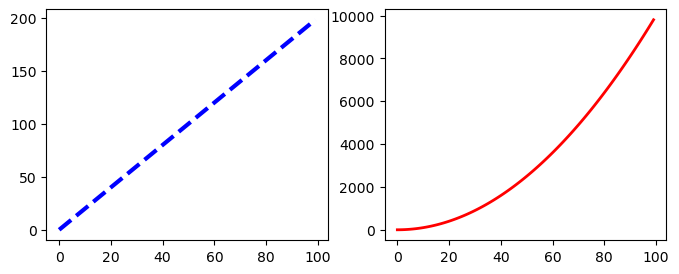

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = [8,3])
axes[0].plot(x,y,'--b',lw = 3)

axes[1].plot(x,z,'r',lw = 2)

plt.show()

## Exercise 5

In [90]:
df.head(3)

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## จงแสดงกราฟรายได้ของทุกปี

In [92]:
df1 = df.groupby('Year')['Profit'].sum()
a = df1.index
b = df1

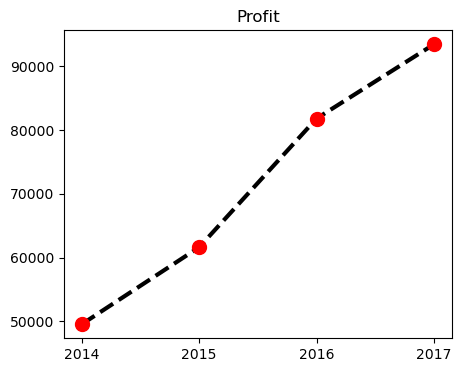

In [131]:
plt.figure(figsize = [5,4])
plt.plot(a,b, ls = '--', lw = 3, c = 'black',
         marker = 'o', mfc = 'r', mec = 'r', ms = 10)
plt.title('Profit')
plt.xticks([2014,2015,2016,2017])

plt.show()

#### โค้ดต่อไปนี้ใช้ในสองข้อสุดท้าย

In [134]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [135]:
df[ df['Category'] == 'Furniture' ].groupby('Year').sum()['Profit']

Year
2014    5457.7255
2015    3015.2029
2016    6959.9531
2017    3018.3913
Name: Profit, dtype: float64

##### Dictionary of Category

In [138]:
arr_df

{'Furniture': Year
 2014    5457.7255
 2015    3015.2029
 2016    6959.9531
 2017    3018.3913
 Name: Profit, dtype: float64,
 'Office Supplies': Year
 2014    22593.4161
 2015    25099.5338
 2016    35061.2292
 2017    39736.6217
 Name: Profit, dtype: float64,
 'Technology': Year
 2014    21492.8325
 2015    33503.8670
 2016    39773.9920
 2017    50684.2566
 Name: Profit, dtype: float64}

In [137]:
arr_df = {}
for i in range(0,df['Category'].nunique()) :
    arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']

## จงแสดงกราฟรายได้ของแต่ละ Category ในแต่ละปีในกราฟเดียว 

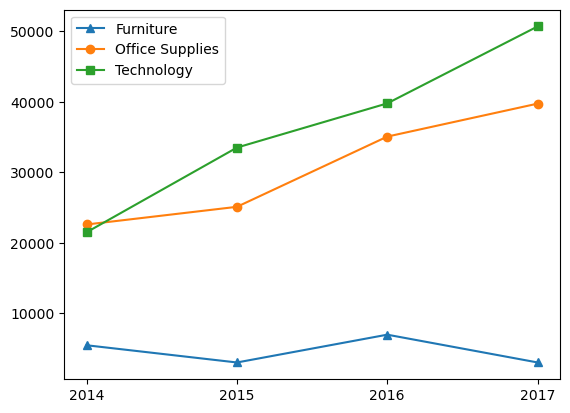

In [171]:
plt.plot(arr_df['Furniture'], label = 'Furniture', marker = '^')
plt.plot(arr_df['Office Supplies'], label = 'Office Supplies', marker = 'o')
plt.plot(arr_df['Technology'], label = 'Technology', marker = 's')
plt.legend(loc = 'upper left')

plt.xticks([2014,2015,2016,2017])

plt.show()

## จงแสดงกราฟรายได้ของแต่ละ Category ในแต่ละปี แบบแยกกราฟ

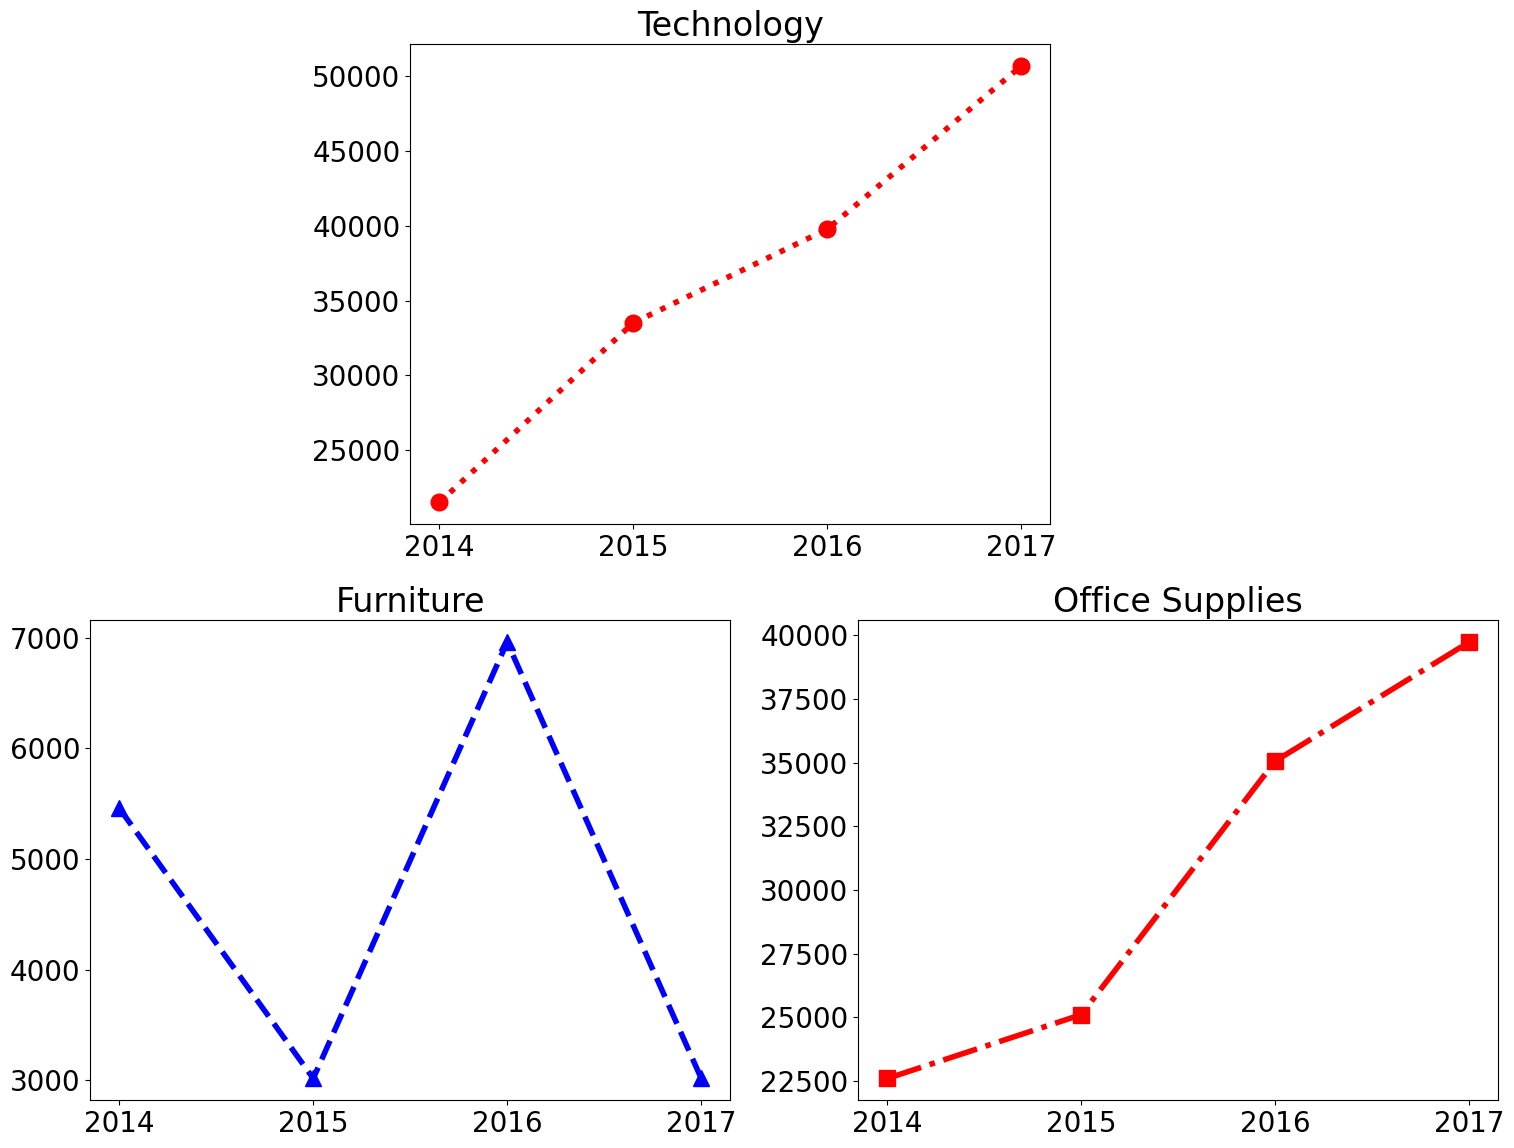

In [217]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(arr_df['Furniture'], '^--b', lw = '4', ms = '12')
a1.set_xticks([2014,2015,2016,2017])
a1.set_yticks([3000,4000,5000,6000,7000])
a1.set_title('Furniture')

a2 = fig.add_axes([1.2,0,1,1])
a2.plot(arr_df['Office Supplies'], 's-.r', lw = '4', ms = '12')
a2.set_xticks([2014,2015,2016,2017])
a2.set_title('Office Supplies')

a3 = fig.add_axes([0.5,1.2,1,1])
a3.plot(arr_df['Technology'], 'o:r', lw = '4', ms = '12')
a3.set_xticks([2014,2015,2016,2017])
a3.set_title('Technology')

plt.rcParams['font.size'] = 20
plt.show()